# NEMA Photoelectric

- Photoelectric interaction in PETALO

In [1]:
import Pkg

In [482]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase"]);

In [504]:
Pkg.add.(["Test"]);

In [48]:
Pkg.add.(["VegaLite","VegaDatasets"]);

In [129]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [4]:
using LsqFit
using GLM

In [5]:
using HTTP
using Plots
using VegaLite
using VegaDatasets
using DataFrames
using HDF5
using DrWatson
using Test

In [6]:
using Glob
using CSV

In [7]:
using Statistics
using StatsBase
using Printf

In [8]:
@quickactivate "JPetalo"

In [9]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [10]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [11]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [12]:
include(srcdir("jpetalo.jl"))

Main.JPetalo

# Characterization of PETALO

### Read a summary data frame with photoelectric interactions

In [13]:
drx = datadir("nema3df")
input = string(drx,"/nema3df_f600_q4_1300_3000_phot.csv")
n3df = DataFrame(CSV.File(input));

In [14]:
println(names(n3df))

["nsipm", "phistd", "q1", "r", "rq", "x1", "x2", "xr1", "xr2", "xt1", "xt2", "y1", "y2", "yr1", "yr2", "yt1", "yt2", "z1", "z2", "zr1", "zr2", "zstd", "zt1", "zt2"]


## Dependence of energy with radius of interaction
- Histograming the energy deposited in the SiPMs yields a wide and non gaussian distribution
- The reason is that the energy deposited in the SiPMs depends of the radius at which the gamms interacted.
- The relation is roughly linear
- This dependence can be used to define an estimator, "rq" of the radius of interaction

In [15]:
hq, phq = JPetalo.hist1d(n3df.q1, 50, "q (pes)");

In [16]:
xe,ye,hqr,phqr = JPetalo.hist2d(n3df.r,n3df.q1, 250, "r (mm)", "q (pes)");
xe,ye,hrrq,phrrq = JPetalo.hist2d(n3df.r,n3df.rq, 250, "r (mm)", "rq (mm)");

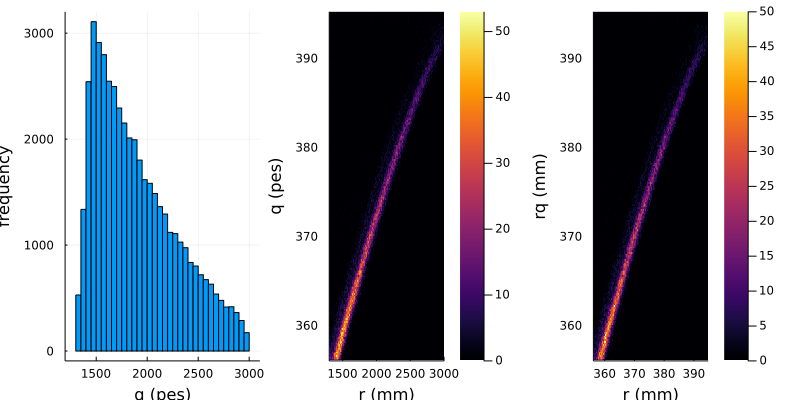

In [17]:
plot(phq, phqr, phrrq, layout = (1, 3), size = (800, 400), 
     legend=false, fmt = :png)

### Roughly linear relation between q and r

In [18]:
pqrdf = JPetalo.p1df(n3df.q1, n3df.r, 100);
lfqr, pqr, cqr = JPetalo.lfit(pqrdf);
cqr

2-element Vector{Float64}:
 327.0633724093492
   0.02252452601664679

In [19]:
prqdf = JPetalo.p1df(n3df.r, n3df.q1, 100);
lfrq, prq, crq = JPetalo.lfit(prqdf);
crq

2-element Vector{Float64}:
 -12487.474687216818
     38.9086800278739

In [20]:
pqr = plot(pqrdf.x_mean,pqrdf.y_mean, yerror=pqrdf.y_std, shape = :circle, color = :black, legend=false)
pqr = plot!(pqr,pqrdf.x_mean,lfqr, lw=3, legend=false)
ylabel!("r (mm)")
xlabel!("q (pes)");

In [21]:
prq = plot(prqdf.x_mean,prqdf.y_mean, yerror=prqdf.y_std, shape = :circle, color = :black, legend=false)
prq = plot!(prq, prqdf.x_mean,lfrq, lw=3, legend=false)
xlabel!("r (mm)")
ylabel!("q (pes)");

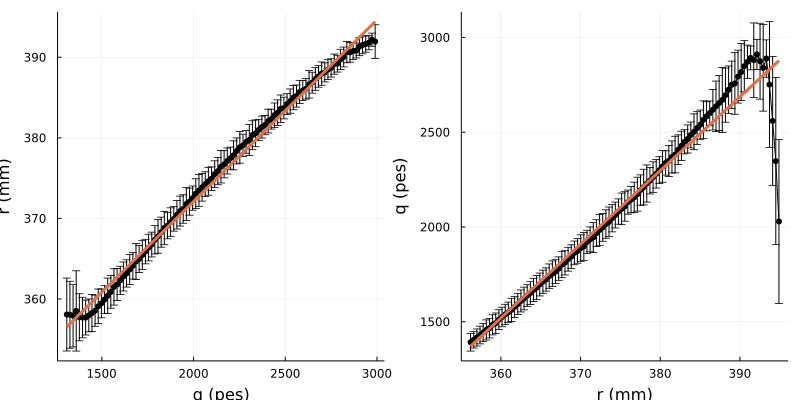

In [22]:
plot(pqr, prq,  layout = (1, 2), size = (800, 400), 
     legend=false, fmt = :png)

### Corrected charge

In [23]:
JPetalo.qcor2!(n3df, x->crq[1] + crq[2] *x, "r", "q1", "qc", 2000.0);

In [24]:
println(names(n3df))

["nsipm", "phistd", "q1", "r", "rq", "x1", "x2", "xr1", "xr2", "xt1", "xt2", "y1", "y2", "yr1", "yr2", "yt1", "yt2", "z1", "z2", "zr1", "zr2", "zstd", "zt1", "zt2", "qc"]


In [25]:
x,y,hqcr,phqcr = JPetalo.hist2d(n3df.r,n3df.qc, 250, "r (mm)", "q (pes)");

In [26]:
hqc, phqc = JPetalo.hist1d(n3df.qc, 50, "q(pes)");

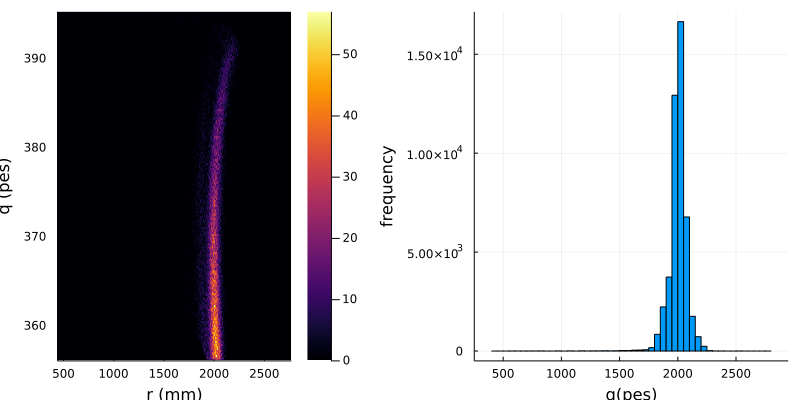

In [27]:
plot(phqcr, phqc,layout = (1, 2), size = (800, 400), 
     legend=false, fmt = :png)

### Number of SiPMs with charge above threshold

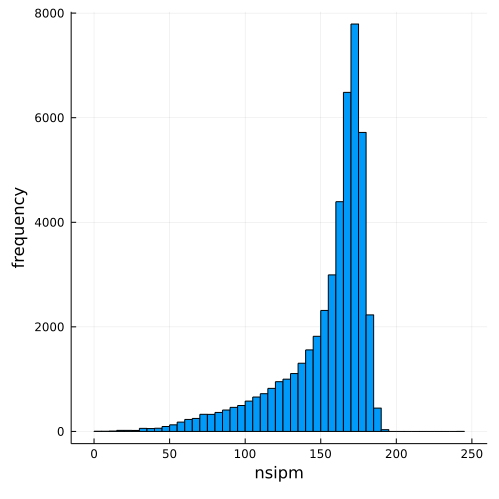

In [28]:
hnsipm, pnsipm = JPetalo.hist1d(n3df.nsipm, 50, "nsipm");
plot(pnsipm,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png)

### std deviation of phi and z (weighted by charge)
- Both are related with radius (not linear relation)
- Fully correlated (at least for phe events)

In [46]:
hphistd, pphistd = JPetalo.hist1d(n3df.phistd, 50, "phistd", 0.0, 0.1);
plot(pphistd,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [48]:
hzstd, pzstd = JPetalo.hist1d(n3df.zstd, 50, "zstd", 0., 30.);
plot(pzstd,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

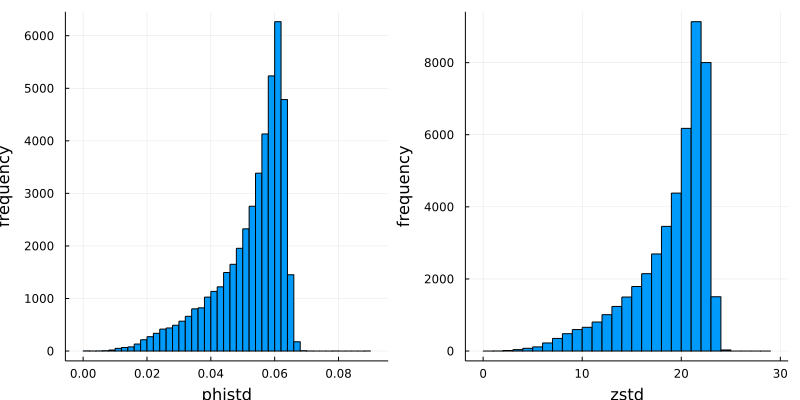

In [49]:
plot(pphistd, pzstd,layout = (1, 2), size = (800, 400), 
     legend=false, fmt = :png)

In [50]:
xe,ye,hrphistd,prphistd = JPetalo.hist2d(n3df.r, n3df.phistd, 250, "phistd", "r (mm)", 360., 390., 0.0,0.1,);

In [51]:
xe,ye,hrzstd,przstd = JPetalo.hist2d(n3df.r, n3df.zstd, 250, "zstd", "r (mm)", 360., 390., 0.0,25.);

In [53]:
xe,ye,hphizstd,pphizstd = JPetalo.hist2d(n3df.phistd, n3df.zstd, 250, "phistd", "zstd", 0.0,0.1, 0.0,25.);

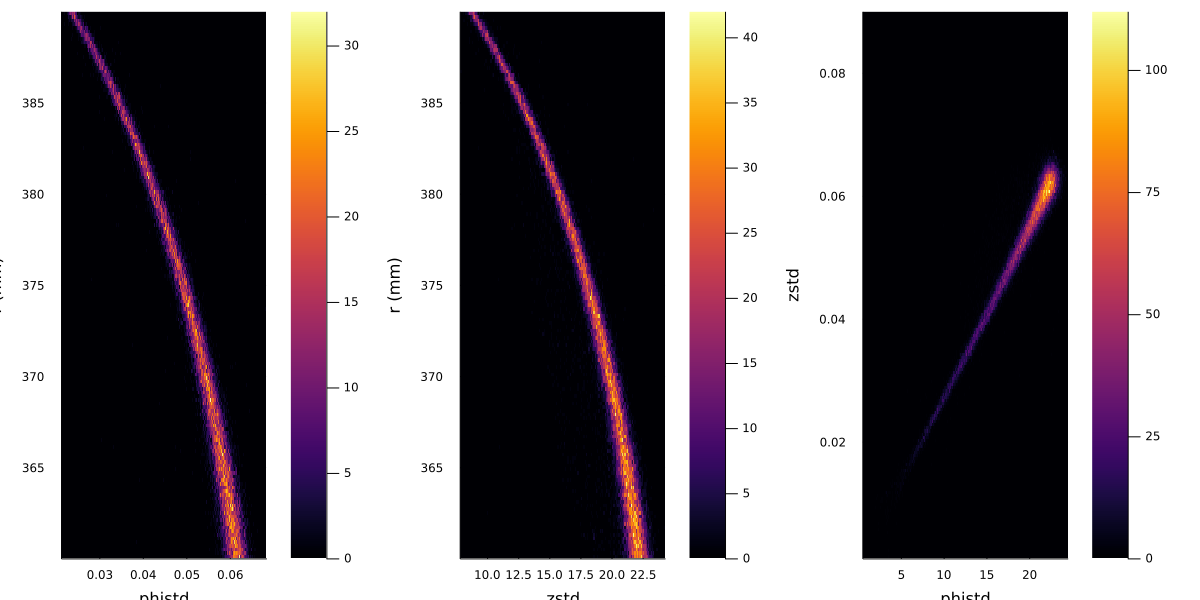

In [54]:
plot(prphistd, przstd, pphizstd, layout = (1, 3), size = (1200, 600), 
     legend=false, fmt = :png)

### Resolution in (x,y,z,r)

In [55]:
hxtxr, pxtxr = JPetalo.hist1d(n3df.xt1 - n3df.xr1, 50, "xt - xr", -10., 10.);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [56]:
hytyr, pytyr = JPetalo.hist1d(n3df.yt1 - n3df.yr1, 50, "yt - yr", -10., 10.);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [57]:
hztzr, pztzr = JPetalo.hist1d(n3df.zt1 - n3df.zr1, 50, "zt - zr", -10., 10.);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [58]:
hrtr, przr = JPetalo.hist1d(n3df.r - n3df.rq, 50, "r - rq", -10., 10.);
plot(przr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

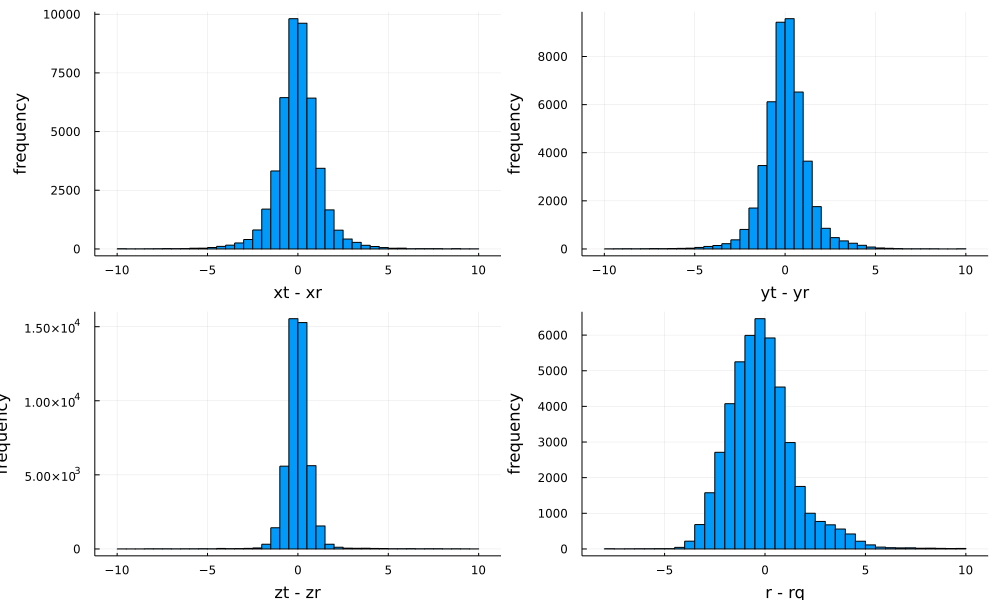

In [59]:
plot(pxtxr, pytyr,pztzr, przr, layout = (2, 2), size = (1000, 600), 
     legend=false, fmt = :png)

In [41]:
xmu, xstd = JPetalo.mean_std(n3df.xt1 - n3df.xr1, -4.0, 4.0)
@printf "Resolution in x (mm) = %5.1f" xstd

Resolution in x (mm) =   1.1

In [42]:
xmu, xstd = JPetalo.mean_std(n3df.yt1 - n3df.yr1, -4.0, 4.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   1.1

In [43]:
xmu, xstd = JPetalo.mean_std(n3df.zt1 - n3df.zr1, -4.0, 4.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   0.6

In [44]:
xmu, xstd = JPetalo.mean_std(n3df.r - n3df.rq, -5.0, 5.0)
@printf "Resolution in y (mm) = %5.1f" xstd

Resolution in y (mm) =   1.5